In [67]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
%matplotlib inline


* If we aggregate	the	prediction of	a	group	of	predictors	(such	as	classifiers	or	regressors),	we will	often	get	better predictions	than	with	the	best	individual	predictor.	A	group	of	predictors	is	called	an ensemble;	thus,	this	technique	is	called	Ensemble	Learning,	and	an	Ensemble	Learning algorithm	is	called	an	Ensemble	method.
* For	example,we can	train	a	group	of	Decision	Tree	classifiers,	each	on	a	different random	subset	of	the	training	set.	To	make	predictions,	we 	just	obtain	the	predictions	of all	individual	trees,	then	predict	the	class	that	gets	the	most	votes		Such	an	ensemble	of	Decision	Trees	is	called	a	"Random	Forest".

# Voting	Classifiers

* A	very	simple	way	to	create	an	even	better	classifier	is	to	aggregate	the	predictions	of	each classifier	and	predict	the	class	that	gets	the	most	votes.
* This	majority-vote	classifier	is called	a	hard	voting	classifier.
* This	voting	classifier	often	achieves	a	higher	accuracy	than	the best	classifier	in	the	ensemble
* Ensemble	methods	work	best	when	the	predictors	are	as	independent	from	one	another	as	possible.
* One way	to	get	diverse	classifiers	is	to	train	them	using	very	different	algorithms.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf=LogisticRegression()
rnd_clf=RandomForestClassifier()
svm_clf=SVC()
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
                            voting='hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=1, voting='hard', weights=None)

In [73]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.88
SVC 0.888
VotingClassifier 0.896


* The	voting	classifier	slightly outperforms	all	the	individual	classifiers.
* If	all	classifiers	are	able	to	estimate	class	probabilities,	then	you	can	tell	Scikit-Learn	to	predict	the	class	with	the	highest	class probability,	averaged	over	all	the	individual	classifiers.	This	is	called	"soft	voting".


In [74]:
svm_clf1 = SVC(probability=True, random_state=42)
voting_clf1=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf1)],
                            voting='soft')
voting_clf1.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=1, voting='soft', weights=None)

In [78]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf1, voting_clf1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.88
SVC 0.888
VotingClassifier 0.92


* It achieves	higher	performance	than	hard	voting	because	it	gives	more	weight	to	highly confident	votes.

In [79]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

In [80]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.show()

* As we can	see	that	as	the	number	of	tosses increases,	the	ratio	of	heads	approaches	51%.	Eventually	all	10	series	end	up	so	close	to 51%	that	they	are	consistently	above	50%.


# Bagging	and	Pasting

* One	way	to	get	a	diverse	set	of	classifiers	is	to	use	very	different	training	algorithms, as we discussed earlier
* Another	approach	is	to	use	the	same	training	algorithm	for	every	predictor,but	to	train	them	on	different	random	subsets	of	the	training	set.
* When	sampling	is performed	with	replacement,	this	method	is	called	"bagging"
* When	sampling	is	performed	without	replacement,	it	is	called	"pasting".
* Both	bagging	and	pasting	allow	training	instances	to	be	sampled	several times	across	multiple	predictors,	but	only	bagging	allows	training	instances	to	be	sampled several	times	for	the	same	predictor.


# Bagging	and	Pasting	in	Scikit-Learn

* Scikit-Learn	offers	a	simple	API	for	both	bagging	and	pasting	with	the BaggingClassifier 	class
* 

In [81]:
# Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
                            DecisionTreeClassifier(),n_estimators=500,
                            max_samples=100,bootstrap=True,n_jobs=-1
                            )
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)

In [82]:
print(accuracy_score(y_test, y_pred))

0.912


In [83]:
# Pasting
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf1 = BaggingClassifier(
                            DecisionTreeClassifier(),n_estimators=500,
                            max_samples=100,bootstrap=False,n_jobs=-1
                            )
bag_clf1.fit(X_train,y_train)
y_pred1=bag_clf.predict(X_test)

In [84]:
print(accuracy_score(y_test, y_pred1))

0.912


In [85]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


* By comparing	the	accuracy 	of	a	single	Decision	Tree	with	the	accuracy	bagging	ensemble	of	500	trees both	trained	on the	moons	dataset,we can see that accuracy of the bagging ensemble(0.912) is higher than the single decision tree(0.856)

In [86]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3,cmap=custom_cmap, linewidth=10)
    plt.contour(x1, x2, y_pred, alpha=0.8,cmap=custom_cmap)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

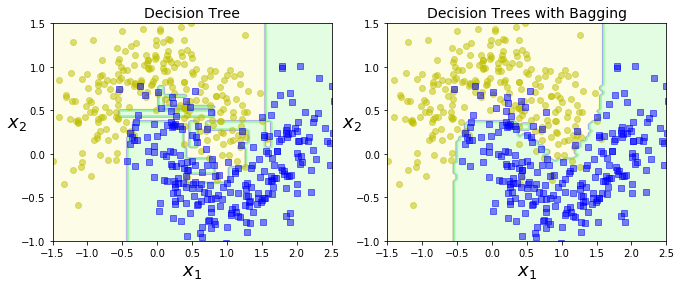

In [87]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

* By comparing 	the	decision	boundary	of	a	single	Decision	Tree	with	the	decision
    boundary	of	a	bagging	ensemble	of	500	trees both	trained	onthe	moons	dataset.
* As we 	can	see,	the	ensemble’s	predictions	will generalize	much better	than	the	single	Decision	Tree’s	predictions
* The	ensemble	has	a	comparable	bias	but a	smaller	variance.

# Out-of-Bag	Evaluation

* With	bagging,	some	instances	may	be	sampled	several	times	for	any	given	predictor,	while others	may	not	be	sampled	at	all.
* By	default	a	 BaggingClassifier 	samples	m	training instances	with	replacement	( bootstrap=True ),	where	m	is	the	size	of	the	training	set.
* This means that about	63%	of	the	training	instances	are	sampled	on	average	for	each predictor. 
* The	remaining	37%	of	the	training	instances	that	are	not	sampled	are	called out-of-bag	(oob)	instances.
* They	are	not	the	same	37%	for	all	predictors.
* Since	a	predictor	never	sees	the	oob	instances	during	training,	it	can	be	evaluated	on	these instances,	without	the	need	for	a	separate	validation	set	or	cross-validation.we	can evaluate	the	ensemble	itself	by	averaging	out	the	oob	evaluations	of	each	predictor.

In [88]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(),n_estimators=500,
bootstrap=True,n_jobs=-1,oob_score=True)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.90400000000000003

* According	to	this	oob	evaluation,	this	 BaggingClassifier 	is	likely	to	achieve	about 90.1%	accuracy	on	the	test	set.

In [89]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.90400000000000003

* the	decision	function	returns	the	class	probabilities	for	eachtraining	instance.

In [90]:
bag_clf.oob_decision_function_

array([[ 0.37634409,  0.62365591],
       [ 0.38333333,  0.61666667],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.10227273,  0.89772727],
       [ 0.34972678,  0.65027322],
       [ 0.01666667,  0.98333333],
       [ 0.99009901,  0.00990099],
       [ 0.98963731,  0.01036269],
       [ 0.76886792,  0.23113208],
       [ 0.        ,  1.        ],
       [ 0.76436782,  0.23563218],
       [ 0.83684211,  0.16315789],
       [ 0.95783133,  0.04216867],
       [ 0.03636364,  0.96363636],
       [ 0.        ,  1.        ],
       [ 0.97714286,  0.02285714],
       [ 0.91954023,  0.08045977],
       [ 1.        ,  0.        ],
       [ 0.02453988,  0.97546012],
       [ 0.36979167,  0.63020833],
       [ 0.91919192,  0.08080808],
       [ 1.        ,  0.        ],
       [ 0.98924731,  0.01075269],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.        ,

# Random	Patches	and	Random	Subspaces

# Random	Forests

* Instead	of	building	a	 BaggingClassifier 	and	passing	it	aDecisionTreeClassifier ,	you	can	instead	use	the	 RandomForestClassifier 	class,	whichis	more	convenient	and	optimized	for	Decision	Trees.
* With	a	few	exceptions,	a	 RandomForestClassifier 	has	all	the	hyperparameters	of	a DecisionTreeClassifier 	(to	control	how	trees	are	grown),	plus	all	the	hyperparameters of	a	 BaggingClassifier 	to	control	the	ensemble	itself.

In [91]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [93]:
print(accuracy_score(y_test, y_pred_rf))

0.92


In [95]:
bag_clf=BaggingClassifier(
DecisionTreeClassifier(splitter="random",max_leaf_nodes=16),
                        n_estimators=500,max_samples=1.0,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred_bag = bag_clf.predict(X_test)

In [96]:
print(accuracy_score(y_test, y_pred_bag))

0.904


# Feature importance

In [97]:
from sklearn.datasets import load_iris
iris=load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.0893086164384
sepal width (cm) 0.0238482340837
petal length (cm) 0.445316068762
petal width (cm) 0.441527080716


In [98]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
rnd_clf1 = RandomForestClassifier(random_state=42)
rnd_clf1.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [99]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.hot,
               interpolation="nearest")
    plt.axis("off")

In [100]:
plot_digit(rnd_clf1.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf1.feature_importances_.min(), rnd_clf1.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

* Similarly,	if	you	train	a	Random	Forest	classifier	on	the	MNIST	dataset 	and	plot	each	pixel’s	importance,	then the plot will be as above
* Random	Forests	are	very	handy	to	get	a	quick	understanding	of	what	features	actually matter,	in	particular	if	we	need	to	perform	feature	selection.

# Boosting

* Boosting 	refers	to	any	Ensemble	method	that	can combine	several	weak	learners	into	a	strong	learner.
* The	general	idea	of	most	boosting methods	is	to	train	predictors	sequentially,	each	trying	to	correct	its	predecessor.
* Some of the boosting methods are :	AdaBoost ,Gradient	Boosting

#  AdaBoost

* To	build	an	AdaBoost	classifier,	a	first	base	classifier	is trained	and	used	to	make	predictions	on	the	training	set.
* The	relative	weight	of misclassified	training	instances	is	then	increased.	A	second	classifier	is	trained	using	the updated	weights	and	again	it	makes	predictions	on	the	training	set,	weights	are	updated,and	so	on.
* More accurate the predictor is higher its weight will be.
* If	it	is	just	guessing	randomly,	then	its	weight	will	be	close	to	zero.
* If	it	is	most	often	wrong	(i.e.,	less	accurate	than	random	guessing),	then	its weight	will	be	negative.

In [101]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

In [103]:
plot_decision_boundary(ada_clf, X, y)

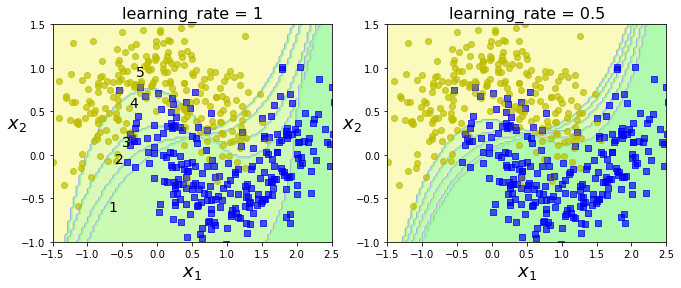

In [39]:
m = len(X_train)
plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    for i in range(5):
        plt.subplot(subplot)
        svm_clf = SVC(kernel="rbf", C=0.05, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
plt.subplot(121)
plt.text(-0.7, -0.65, "1", fontsize=14)
plt.text(-0.6, -0.10, "2", fontsize=14)
plt.text(-0.5,  0.10, "3", fontsize=14)
plt.text(-0.4,  0.55, "4", fontsize=14)
plt.text(-0.3,  0.90, "5", fontsize=14)
plt.show()

# Gradient	Boosting

* Gradient	Boosting	works	by	sequentially	adding	predictors	to	an	ensemble,	each	one correcting	its	predecessor.
* Instead	of	tweaking	the	instance	weights	at	every iteration	like	AdaBoost	does,	this	method	tries	to	fit	the	new	predictor	to	the	residual errors	made	by	the	previous	predictor.


* For example, first,let’s	fit	aDecisionTreeRegressor 	to	the	training	set

In [105]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [106]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

* Now	train	a	second	 DecisionTreeRegressor 	on	the	residual	errors	made	by	the	first predictor.

In [107]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

* Then	we	train	a	third	regressor	on	the	residual	errors	made	by	the	second	predictor.

In [108]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

* Now	we	have	an	ensemble	containing	three	trees.	It	can	make	predictions	on	a	new instance	simply	by	adding	up	the	predictions	of	all	the	trees

In [109]:
X_new = np.array([[0.8]])

In [110]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([ 0.75026781])

In [111]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=3, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [112]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    plt.axis(axes)

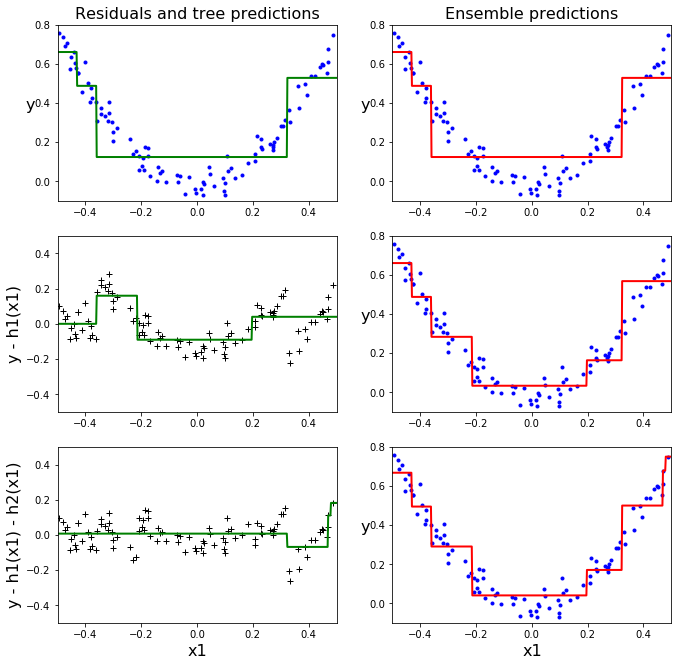

In [113]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="h1(x1)", style="g-", data_label="Training set")
plt.ylabel("y", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="h(x1)=h1(x1)", data_label="Training set")
plt.ylabel("y", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="h2(x1)", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("y - h1(x1)", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="h(x1) = h1(x1) + h2(x1)")
plt.ylabel("y", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="h3(x1)", style="g-", data_style="k+")
plt.ylabel("y - h1(x1) - h2(x1)", fontsize=16)
plt.xlabel("x1", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="h(x1) = h1(x1) + h2(x1) + h3(x1)")
plt.xlabel("x1", fontsize=16)
plt.ylabel("y", fontsize=16, rotation=0)

plt.show()

* Above plot represents	the	predictions	of	these	three	trees	in	the	left	column,	and	the ensemble’s	predictions	in	the	right	column.
* 	In	the	first	row,	the	ensemble	has	just	one	tree, so	its	predictions	are	exactly	the	same	as	the	first	tree’s	predictions
* In	the	second	row,	a new	tree	is	trained	on	the	residual	errors	of	the	first	tree.
* On	the	right	we	can	see	that	the ensemble’s	predictions	are	equal	to	the	sum	of	the	predictions	of	the	first	two	trees.
* In	the	third	row	another	tree	is	trained	on	the	residual	errors	of	the	second	tree.we	can	see	that	the	ensemble’s	predictions	gradually	get	better	as	trees	are	added	to	the ensemble.

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=3, presort='auto',
             random_state=42, subsample=1.0, verbose=0, warm_start=False)

In [60]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

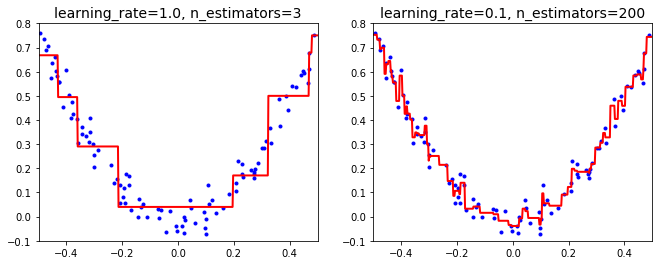

In [62]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

plt.show()

* The	 learning_rate 	hyperparameter	scales	the	contribution	of	each	tree.	If	you	set	it	to	a low	value,	such	as	 0.1 ,	you	will	need	more	trees	in	the	ensemble	to	fit	the	training	set,	but the	predictions	will	usually	generalize	better.	
* 	Above shows	two	GBRT	ensembles	trained	with	a	low	learning	rate:	the one	on	the	left	does	not	have	enough	trees	to	fit	the	training	set,	while	the	one	on	the	right has	too	many	trees	and	overfits	the	training	set.

In [63]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=55, presort='auto',
             random_state=42, subsample=1.0, verbose=0, warm_start=False)

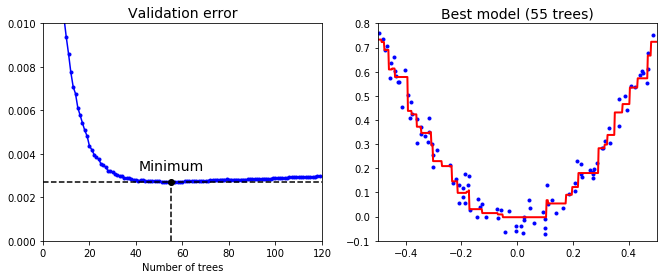

In [65]:
plt.figure(figsize=(11, 4))
min_error = np.min(errors)
plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)

plt.show()


* Measures the	validation	error	at	each	stage	of	training	to	find	the	optimal	number	of	trees,	and finally	trains	another	GBRT	ensemble	using	the	optimal	number	of	trees.